My Tree Accuracy: 0.6888888888888889
Sklearn Tree Accuracy: 0.6666666666666666


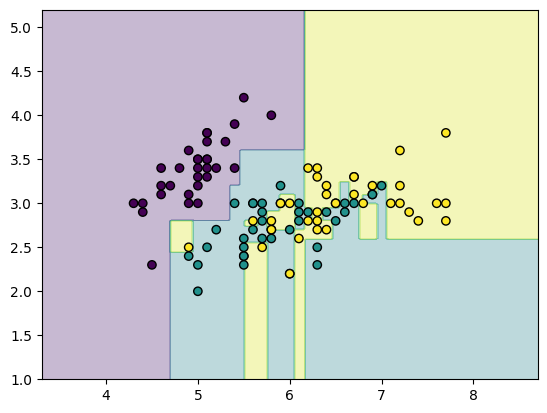

'my_tree.png'

In [6]:
from decision_trees import *
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

data = load_iris()
x = data.data
y = data.target

x = x[:, [0, 1]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
my_tree = build_next_node(x_train, y_train, gini_index)

def tree_predict(tree, X):
    preds = []
    for x in X:
        preds.append(tree.predict(x.reshape(1, -1)))
    return np.array(preds)

y_pred_my = tree_predict(my_tree, x_test)
print("My Tree Accuracy:", accuracy_score(y_test, y_pred_my))

sk_tree = DecisionTreeClassifier(criterion="gini")
sk_tree.fit(x_train, y_train)

y_pred_sk = sk_tree.predict(x_test)
print("Sklearn Tree Accuracy:", accuracy_score(y_test, y_pred_sk))


def plot_decision_boundary(tree, X, y):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    Z = tree_predict(tree, np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
    plt.show()

plot_decision_boundary(my_tree, x_train, y_train)


